# Exploratory Data Analysis- Ecommerce data

### Objectives :

This E-commerce data made by the UCI Machine Learning Repository, containing actual transactions from 2010 to 2011 
    for the UK based and registered non store online retail.
    we are going to do customer segmentation using RFM. We are making the different groups of customer using kmeans algorithm.We will build the target by doing the marketing analysis.

In [248]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [249]:
main= pd.read_csv('data.csv',encoding= 'ISO-8859-1')
main.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [250]:
# explore the dataset further by looking at number of columns, rows and datatype
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 22.7+ MB


In [251]:
# quick look the dataset.
main.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Data Cleaning :

In [252]:
# Check the number of missing values in each columns.
main.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

There is null values in CustomerID value and Descriptions.
Here we are removing the rows which are having null value in customerID.

In [253]:
main_1 = main.dropna(subset=['CustomerID'])
len(main_1)

406829

Now we are having main_1 dataset for further analysis.
The Quantity and UnitPrice data should not be in negative values.
So let's check the data and convert the values in "NA"

In [254]:
main_1['Quantity'].min()

-80995

In [255]:
main_1['Quantity'] = main_1['Quantity'].apply(lambda x:x if x>0 else "NA")
main_1['UnitPrice'] = main_1['UnitPrice'].apply(lambda x: x if x>0 else "NA")

<ipython-input-255-fa6932c5e952>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_1['Quantity'] = main_1['Quantity'].apply(lambda x:x if x>0 else "NA")
<ipython-input-255-fa6932c5e952>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_1['UnitPrice'] = main_1['UnitPrice'].apply(lambda x: x if x>0 else "NA")


In [256]:
main_1 = main_1[(main_1['Quantity']!= 'NA') & (main_1['UnitPrice']!= 'NA') ]
len(main_1)

397884

In [257]:
#chnage the Quantity and UnitPrice int datatype
main_1[['Quantity', 'UnitPrice']] = main_1[['Quantity', 'UnitPrice']].apply(pd.to_numeric)

In [258]:
# Change the datatype of InvoiceDate into dateformat.
main_1['InvoiceDate'] = pd.to_datetime(main_1['InvoiceDate'])

In [259]:
main_1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [260]:
main_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 21.2+ MB


### RFM:

Now we are done with data cleaning. Now let's segregate the customer using RFM.

In RFM analysis, you look at the recency, frequency and the monetary scores of all the customers for segmentation.

Recency: It measures how recently customer visited the store.

Frequency: It measures the frequency of the transactions the customers made.

Monetary: It measures how much the customer spent on purchases made.

In [261]:
# add a new column as "Total Amount" in dataset.
main_1['totalAmount'] = main_1['Quantity'] * main_1['UnitPrice']

In [262]:
# Calculate the recency of data.
maxInvoice = main_1['InvoiceDate'].max()
maxInvoice = maxInvoice + pd.DateOffset(days=1)
print(maxInvoice)
main_1['maxInvDate'] = (maxInvoice - main_1['InvoiceDate']).dt.days
print(main_1.head())

2011-12-10 12:50:00
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  totalAmount  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom        15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom        22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34   

   maxInvDate  
0         374  
1         374  
2         374  
3         374  
4   

In [265]:
# Combining recency, frequency and monetary parameters.
RFM = main_1.groupby(['CustomerID'], as_index = False).agg({'maxInvDate':np.min,'InvoiceNo':'count','totalAmount':np.sum})
RFM = RFM.rename({'maxInvDate':'Recency','InvoiceNo':'Frequency'},axis =1)
RFM.head()

,CustomerID,Recency,Frequency,totalAmount
0,12346.0,326,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,310,17,334.40


307.41499999999996
1661.7400000000007
1354.3250000000007


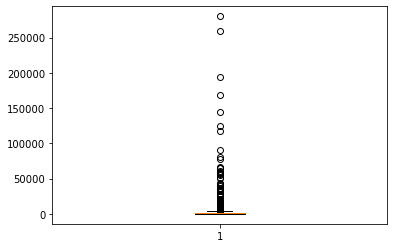

In [266]:
# outlier treatment on totalAmount.
# fig, axs = plt.subplots(1,3)
plt.boxplot(RFM.totalAmount)
Q1 = RFM.totalAmount.quantile(0.25)
print(Q1)
Q3 = RFM.totalAmount.quantile(0.75)
print(Q3)
IQR = Q3 - Q1
print(IQR)
RFM = RFM[(RFM.totalAmount >= Q1 - 1.5*IQR) & (RFM.totalAmount <= Q3 + 1.5*IQR)]


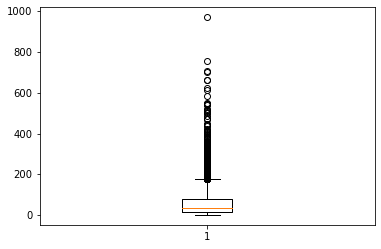

In [267]:

# outlier treatment for Frequency
plt.boxplot(RFM.Frequency)
Q1 = RFM.Frequency.quantile(0.25)
Q3 = RFM.Frequency.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Frequency >= Q1 - 1.5*IQR) & (RFM.Frequency <= Q3 + 1.5*IQR)]


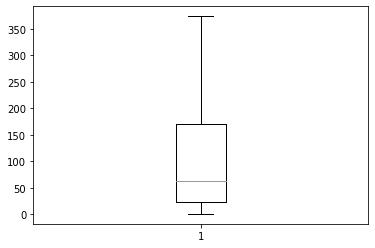

In [268]:

# outlier treatment for Recency
plt.boxplot(RFM.Recency)
Q1 = RFM.Recency.quantile(0.25)
Q3 = RFM.Recency.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Recency >= Q1 - 1.5*IQR) & (RFM.Recency <= Q3 + 1.5*IQR)]

In [269]:
RFM.head(10)

,CustomerID,Recency,Frequency,totalAmount
2,12348.0,75,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,310,17,334.40
5,12352.0,36,85,2506.04
6,12353.0,204,4,89.00
7,12354.0,232,58,1079.40
8,12355.0,214,13,459.40
9,12356.0,23,59,2811.43
11,12358.0,2,19,1168.06
13,12360.0,52,129,2662.06


In [270]:
RFM_1 = RFM.drop('CustomerID', axis = 1)
RFM_1.head()

,Recency,Frequency,totalAmount
2,75,31,1797.24
3,19,73,1757.55
4,310,17,334.40
5,36,85,2506.04
6,204,4,89.00


In [271]:
# Now we are scaling and normalizing the RFM dataframe to Standardise the data.


# Scaling.
standardScaler = StandardScaler()
# normalizing.
standardScaler.fit_transform(RFM_1)

array([[-0.28895014, -0.36934081,  1.31982535],
       [-0.83348139,  0.65787181,  1.26719754],
       [ 1.9961364 , -0.71174501, -0.61985855],
       ...,
       [ 0.74176975, -0.95631944, -0.95609836],
       [-0.94044289, -0.83403223, -0.82717416],
       [-0.60011085,  0.58449948,  1.37291724]])

The data preparation part is done now. There are two methods for clustering Kmeans and heirarchical clustering.
Now we are using Kmeans algorithm for clustering the data.
In Kmeans clustering we need to define the optimal number of clusters i.e. the optimum value of k.
For this we are using elbow method.

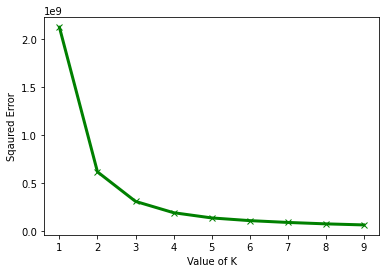

In [272]:

kvalue = []
K      = range(1, 10)
for i in K: 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(RFM_1) 
      
    # calculates squared error 
    # for the clustered points 
    kvalue.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(K, kvalue, 'bx-', color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error") 
plt.show() # clear the plot 
  
# the point of the elbow 4 is the  most optimal value for choosing k i.e k = 4

In [273]:
clust_model = KMeans(n_clusters = 4, max_iter=50)
print(clust_model.fit(RFM_1))
clust_label = clust_model.labels_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [274]:
RFM.index = pd.RangeIndex(len(RFM.index))
clustered_data = pd.concat([RFM, pd.Series(clust_label)], axis=1)
clustered_data.columns = ['CustomerID', 'Recency','Frequency','totalAmount', 'ClusterID']
clustered_data.head()

,CustomerID,Recency,Frequency,totalAmount,ClusterID
0,12348.0,75,31,1797.24,2
1,12349.0,19,73,1757.55,2
2,12350.0,310,17,334.40,3
3,12352.0,36,85,2506.04,1
4,12353.0,204,4,89.00,3


In [275]:
clustered_data['Frequency'].unique()

array([ 31,  73,  17,  85,   4,  58,  13,  59,  19, 129,  10,  23,  22,
        11, 167,  63,  52,  14,  33,  77,  40, 104,  87,  99,  27, 100,
        32,  64, 156, 126,   5,  54, 105,  26,  61,  38,  18,  34,  29,
        45,  39, 125,  30,  36,  50,  16,  98,  12,  57,   8,  43,  15,
        90,  62,  35,  83,  47, 154,  75,  55,  20, 149,   9,  21,  69,
         7,  51, 124, 152, 106,  71,  92,  66, 121,  60,  28,  88, 147,
       114,  24,  96, 118, 132,   2, 101,  65, 153,  42,  86,  41,  53,
        48,   3, 157,  72,  37, 161,  46, 134,  97,  95,  25, 103,  84,
         6,  91,  56, 175, 123, 113,  78, 110, 107,  82, 120, 116,  79,
       109, 151,  76,  89,   1, 131, 172, 136, 112, 145, 140,  44, 127,
       135,  74, 142, 108,  67, 141,  81, 119, 166, 128, 158, 155,  49,
       162, 115,  93, 174, 146, 102, 117,  70, 137, 139, 165, 122, 148,
       160, 111, 143,  80, 159, 144, 130, 164,  68, 168, 170, 138,  94,
       163, 171, 133, 150, 169], dtype=int64)

We have merged each cluster corresponding to their customerID.
Now we will aggregate the RFM value to see the behavior of the 4 clusters.

In [277]:
clust_mean = clustered_data.groupby('ClusterID').agg({'Recency':np.mean,'Frequency':np.mean,'totalAmount':np.mean})
clust_mean = clust_mean.reset_index()
clust_mean

,ClusterID,Recency,Frequency,totalAmount
0,0,78.781962,54.490585,812.295552
1,1,44.091575,112.029304,2765.414656
2,2,58.566540,76.863118,1625.293954
3,3,140.888769,23.075594,272.890794


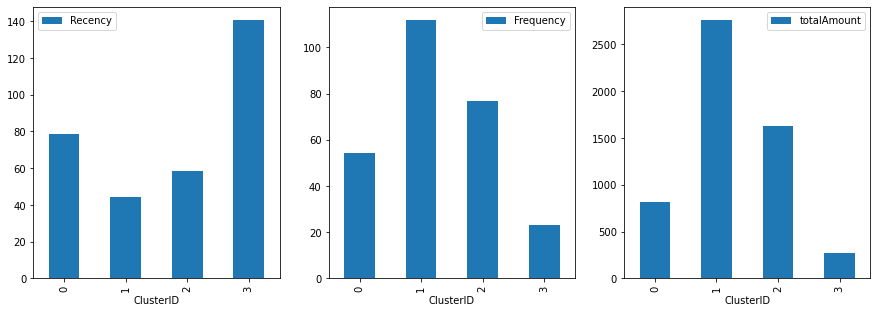

In [308]:
fig  = plt.figure(figsize=(15,5))

# Divide the figure into a 1x2 grid, and give me the first section
ax1 = fig.add_subplot(131)

ax2 = fig.add_subplot(132)

ax3 = fig.add_subplot(133)

# fig, (ax1, ax2,ax3) = plt.subplots(3, 1)
clust_mean.plot.bar(x='ClusterID', y='Recency',ax = ax1)
clust_mean.plot.bar(x='ClusterID', y='Frequency',ax = ax2)
clust_mean.plot.bar(x='ClusterID', y='totalAmount',ax = ax3)
fig.subplots_adjust(hspace=0.5)

# Conclusion :

The model is done. our task to make the groups of customers for marketing analysis is done.
we have grouped the clusters and taken the mean value of Recency, Frequency, Monetary which will help to know the profile of customers. so that we can fix the targets.
Cluster 1 : is the champion customers as we can see those customers has highest Monetary and Frequency, some are recent customers.
Cluster 3 : we need focus on this customers as they are very recent but their Monetary and Frequncy is very low. we can give them discounts for keeping them engage.
Clusters 0 and 2 : This categories has low Monetary and low Frequency respectively. We can ask them for memberships and can give them discounts less than the cluster 3 customers.